# USA HOUSING PRICE

## importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Data collection
## collected from FRED website
** S&P/Case-Shiller U.S. National Home Price Index **

### CSUSHPISA - constant-quality-adjusted median sales price
### CSUSHPINSA- constant-quality-adjusted median price per square foot

In [3]:
df = pd.read_csv("/Users/vikash/Desktop/dataset/CSUSHPISA.csv")
df

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
436,2023-05-01,302.566
437,2023-06-01,304.593
438,2023-07-01,306.767
439,2023-08-01,309.155


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       441 non-null    object 
 1   CSUSHPISA  441 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [46]:
Target = pd.read_csv("/Users/vikash/Desktop/dataset/CSUSHPINSA.csv")
Target.head()

,DATE,CSUSHPINSA
0,1987-01-01,63.735
1,1987-02-01,64.135
2,1987-03-01,64.470
3,1987-04-01,64.973
4,1987-05-01,65.547


In [47]:
Target.set_index('DATE', inplace =True)
Target.rename(columns= {'CSUSHPINSA': 'Target'}, inplace =True)
Target.index = pd.to_datetime(Target.index)
Target = Target["1987-01-01":"2023-09-01"]
Target.shape

(440, 1)

## POPTHM stands for "Potentially Overvalued Housing Markets". It is a term used by the Federal Reserve to identify areas where house prices are rising rapidly

In [9]:
populations=pd.read_csv('/Users/vikash/Desktop/dataset/POPTHM.csv')
populations

,DATE,POPTHM
0,1987-01-01,241857.0
1,1987-02-01,242005.0
2,1987-03-01,242166.0
3,1987-04-01,242338.0
4,1987-05-01,242516.0
...,...,...
434,2023-03-01,334753.0
435,2023-04-01,334880.0
436,2023-05-01,335013.0
437,2023-06-01,335163.0


In [10]:
populations.set_index('DATE', inplace =True)
populations.rename(columns= {'POPTHM': 'populations'}, inplace =True)
populations.index = pd.to_datetime(populations.index)
populations = populations["1987-01-01":"2023-09-01"]

In [11]:
populations.shape

(439, 1)

### Income is what people earn from their work, from the land they own, and from the money they invest. It also includes money that people receive from the government, such as Social Security payments or unemployment benefits.

In [12]:
income = pd.read_csv('/Users/vikash/Desktop/dataset/PI.csv')
income

,DATE,PI
0,1987-01-01,3820.2
1,1987-02-01,3845.0
2,1987-03-01,3863.8
3,1987-04-01,3875.4
4,1987-05-01,3908.6
...,...,...
434,2023-03-01,22757.9
435,2023-04-01,22815.8
436,2023-05-01,22893.1
437,2023-06-01,22941.5


In [13]:
income.set_index('DATE', inplace =True)
income.rename(columns= {'PI': 'income'}, inplace =True)
income.index = pd.to_datetime(income.index)
income = income["1987-01-01":"2023-09-01"]
income.shape

(439, 1)

### The gross domestic product (GDP) is the market value of all final goods and services produced within a country's borders in a specific time period, usually one year. It is the most widely used measure of a country's economic output.

In [17]:
gdp = pd.read_csv("/Users/vikash/Desktop/dataset/GDP.csv")
gdp

,DATE,GDP
0,1987-01-01,4722.156
1,1987-04-01,4806.160
2,1987-07-01,4884.555
3,1987-10-01,5007.994
4,1988-01-01,5073.372
...,...,...
142,2022-07-01,25994.639
143,2022-10-01,26408.405
144,2023-01-01,26813.601
145,2023-04-01,27063.012


In [18]:
gdp.set_index('DATE', inplace =True)
gdp.index = pd.to_datetime(gdp.index)

# Resampling
gdp = gdp.resample('M').ffill()

# Set the day of the index to 1
gdp.index = gdp.index.map(lambda x: x.replace(day=1))
gdp = gdp["1987-01-01":"2023-09-01"]
gdp

,GDP
DATE,
1987-01-01,4722.156
1987-02-01,4722.156
1987-03-01,4722.156
1987-04-01,4806.160
1987-05-01,4806.160
...,...
2023-03-01,26813.601
2023-04-01,27063.012
2023-05-01,27063.012


# resample 
**To reduce the size of the data set.**
**To improve the performance of your analysis.**
**To make the data more consistent.**
**To make the data more representative of the population**

### The unemployment rate is the percentage of people who are unemployed out of the total number of people who are able and willing to work.

In [19]:
unemployed_rate = pd.read_csv('/Users/vikash/Desktop/dataset/UNRATE.csv')
unemployed_rate

,DATE,UNRATE
0,1987-01-01,6.6
1,1987-02-01,6.6
2,1987-03-01,6.6
3,1987-04-01,6.3
4,1987-05-01,6.3
...,...,...
434,2023-03-01,3.5
435,2023-04-01,3.4
436,2023-05-01,3.7
437,2023-06-01,3.6


In [20]:
unemployed_rate.set_index('DATE', inplace =True)
unemployed_rate.rename(columns= {'UNRATE': 'unemployed_rate'}, inplace =True)
unemployed_rate.index = pd.to_datetime(unemployed_rate.index)
unemployed_rate = unemployed_rate["1987-01-01":"2023-09-01"]
unemployed_rate.shape

(439, 1)

### A mortgage rate is the interest you pay on a loan to buy a house.

In [21]:
mortgage =pd.read_csv("/Users/vikash/Desktop/dataset/MORTGAGE30US.csv")
mortgage

,DATE,MORTGAGE30US
0,1987-01-01,9.2040
1,1987-02-01,9.0825
2,1987-03-01,9.0350
3,1987-04-01,9.8325
4,1987-05-01,10.5960
...,...,...
435,2023-04-01,6.3425
436,2023-05-01,6.4250
437,2023-06-01,6.7140
438,2023-07-01,6.8400


In [22]:
mortgage.set_index('DATE', inplace =True)
mortgage.rename(columns= {'MORTGAGE30US': 'mortgage_rate'}, inplace =True)
mortgage.index = pd.to_datetime(mortgage.index)
mortgage = mortgage["1987-01-01":"2023-09-01"]
mortgage.shape

(440, 1)

### Employment-Population Ratio- The employment-population ratio is the percentage of the population that is employed. It is calculated by dividing the number of employed people by the total population. A higher employment-population ratio indicates that more people are working, while a lower ratio indicates that fewer people are working

In [25]:
emp_ratio = pd.read_csv("/Users/vikash/Desktop/dataset/EMRATIO.csv")
emp_ratio

,DATE,EMRATIO
0,1987-01-01,61.0
1,1987-02-01,61.1
2,1987-03-01,61.2
3,1987-04-01,61.3
4,1987-05-01,61.6
...,...,...
434,2023-03-01,60.4
435,2023-04-01,60.4
436,2023-05-01,60.3
437,2023-06-01,60.3


In [26]:
emp_ratio.set_index('DATE', inplace =True)
emp_ratio.rename(columns= {'EMRATIO': 'emp_ratio'}, inplace =True)
emp_ratio.index = pd.to_datetime(emp_ratio.index)
emp_ratio = emp_ratio["1987-01-01":"2023-09 -01"]
emp_ratio.shape

(439, 1)

### Building Construction issued permit in US
#### A building permit is a document issued by a local government agency that allows the construction of a new building or the renovation of an existing building. The permit process is designed to ensure that new construction meets all applicable building codes and zoning regulations.In real estate, a building permit is often used as a way to verify that a property is in good condition and that it can be used for its intended purpose. For example, if you are buying a home that is being converted into a duplex, the seller will need to provide you with a copy of the building permit to show that the conversion was done in accordance with all applicable codes.


In [27]:
permit = pd.read_csv("/Users/vikash/Desktop/dataset/PERMIT.csv")
permit

,DATE,PERMIT
0,1987-01-01,1690.0
1,1987-02-01,1689.0
2,1987-03-01,1704.0
3,1987-04-01,1601.0
4,1987-05-01,1500.0
...,...,...
434,2023-03-01,1437.0
435,2023-04-01,1417.0
436,2023-05-01,1496.0
437,2023-06-01,1441.0


### The participation rate is the percentage of the population that is either working or actively looking for work

In [28]:
labor_percent = pd.read_csv("/Users/vikash/Desktop/dataset/CIVPART.csv")
labor_percent

,DATE,CIVPART
0,1987-01-01,65.4
1,1987-02-01,65.5
2,1987-03-01,65.5
3,1987-04-01,65.4
4,1987-05-01,65.7
...,...,...
434,2023-03-01,62.6
435,2023-04-01,62.6
436,2023-05-01,62.6
437,2023-06-01,62.6


In [29]:
labor_percent.set_index('DATE', inplace =True)
labor_percent.rename(columns= {'CIVPART': 'labor_percent'}, inplace =True)
labor_percent.index = pd.to_datetime(labor_percent.index)
labor_percent = labor_percent["1987-01-01":"2023-09-01"]
labor_percent.shape

(439, 1)

### MSACSR stands for Monthly Sales Average Change in Single-Family Residences Sold. It is a measure of the monthly change in the average price of single-family homes sold in the United States. The MSACSR is calculated by taking the average price of all single-family homes sold in the previous month and dividing it by the average price of all single-family homes sold in the same month one year ago. The MSACSR is a leading indicator of the housing market, and it is often used to predict future changes in home prices

In [30]:
monthly_supply = pd.read_csv("/Users/vikash/Desktop/dataset/MSACSR.csv")
monthly_supply

,DATE,MSACSR
0,1987-01-01,6.0
1,1987-02-01,6.2
2,1987-03-01,6.0
3,1987-04-01,6.0
4,1987-05-01,6.7
...,...,...
434,2023-03-01,8.1
435,2023-04-01,7.6
436,2023-05-01,7.2
437,2023-06-01,7.5


In [31]:
monthly_supply.set_index('DATE', inplace =True)
monthly_supply.rename(columns= {'MSACSR': 'monthly_supply'}, inplace =True)
monthly_supply.index = pd.to_datetime(monthly_supply.index)
monthly_supply = monthly_supply["1987-01-01":"2023-09-01"]
monthly_supply.shape

(439, 1)

### This is a measure of the number of units of new housing projects started in a given period 

In [32]:
House_starts = pd.read_csv("/Users/vikash/Desktop/dataset/HOUST.csv")
House_starts

,DATE,HOUST
0,1987-01-01,1774.0
1,1987-02-01,1784.0
2,1987-03-01,1726.0
3,1987-04-01,1614.0
4,1987-05-01,1628.0
...,...,...
434,2023-03-01,1380.0
435,2023-04-01,1348.0
436,2023-05-01,1583.0
437,2023-06-01,1418.0


In [33]:
House_starts.set_index('DATE', inplace =True)
House_starts.rename(columns= {'HOUST': 'house_st'}, inplace =True)
House_starts.index = pd.to_datetime(House_starts.index)
House_starts = House_starts["1987-01-01":"2023-09-01"]
House_starts.shape

(439, 1)

### USCONS stands for "U.S. Consensus Forecast." It is a monthly survey of leading economists conducted by the Federal Reserve Bank of Philadelphia. The survey asks economists to provide their forecasts for a variety of economic indicators, including U.S. house prices. The USCONS is considered to be a reliable indicator of future house price movements.

In [34]:
total_emp_cons = pd.read_csv("/Users/vikash/Desktop/dataset/USCONS.csv")
total_emp_cons

,DATE,USCONS
0,1939-01-01,1139
1,1939-02-01,1162
2,1939-03-01,1225
3,1939-04-01,1249
4,1939-05-01,1262
...,...,...
1013,2023-06-01,7955
1014,2023-07-01,7967
1015,2023-08-01,7997
1016,2023-09-01,8010


In [35]:
total_emp_cons.set_index('DATE', inplace =True)
total_emp_cons.rename(columns= {'USCONS': 'total_emp_cons'}, inplace =True)
total_emp_cons.index = pd.to_datetime(total_emp_cons.index)
total_emp_cons = total_emp_cons["1987-01-01":"2023-09-01"]
total_emp_cons.shape

(441, 1)

### The homeownership rate-The homeownership rate is the percentage of people who own their own homes. It is calculated by dividing the number of owner-occupied housing units by the total number of housing units. The homeownership rate in the United States has been declining in recent years. In 2020, the homeownership rate was 65.5%, down from 69.5% in 2005. There are a number of factors that have contributed to the decline in homeownership, including rising housing prices, student loan debt, and a decline in the availability of affordable housing. The homeownership rate is important because it is a key indicator of the health of the economy. When more people own their own homes, it means that there is more wealth in the economy. Homeowners are also more likely to be invested in their communities, which can lead to stronger neighborhoods and a more vibrant economy

In [36]:
home_ow_rate = pd.read_csv("/Users/vikash/Desktop/dataset/RSAHORUSQ156S.csv")
home_ow_rate

,DATE,RSAHORUSQ156S
0,1987-01-01,63.9
1,1987-04-01,63.9
2,1987-07-01,64.1
3,1987-10-01,64.1
4,1988-01-01,63.8
...,...,...
142,2022-07-01,66.0
143,2022-10-01,65.9
144,2023-01-01,66.0
145,2023-04-01,65.9


In [37]:
home_ow_rate.set_index('DATE', inplace =True)
home_ow_rate.index = pd.to_datetime(home_ow_rate.index)
home_ow_rate.rename(columns= {'RSAHORUSQ156S': 'home_ow_rate'}, inplace =True)

# Resampling
home_ow_rate = home_ow_rate.resample('M').ffill()

# Set the day of the index to 1
home_ow_rate.index = home_ow_rate.index.map(lambda x: x.replace(day=1))
home_ow_rate = home_ow_rate["1987-01-01":"2023-09-01"]
home_ow_rate.shape

(439, 1)

### PSAVERT stands for "Percent Change from Average House Price in the Past Year." It is a measure of how much house prices have changed in the past year, relative to the average house price. A PSAVERT of 100 means that house prices have not changed at all in the past year. A PSAVERT of 110 means that house prices have increased by 10% in the past year. A PSAVERT of 90 means that house prices have decreased by 10% in the past year. PSAVERT is a useful tool for tracking the housing market and for making decisions about whether to buy or sell a house

In [38]:
p_saving_rate =pd.read_csv("/Users/vikash/Desktop/dataset/PSAVERT.csv")
p_saving_rate.head()

,DATE,PSAVERT
0,1987-01-01,9.4
1,1987-02-01,8.2
2,1987-03-01,8.1
3,1987-04-01,4.1
4,1987-05-01,7.8


In [39]:
p_saving_rate.set_index('DATE', inplace =True)
p_saving_rate.rename(columns= {'PSAVERT': 'p_saving_rate'}, inplace =True)
p_saving_rate.index = pd.to_datetime(p_saving_rate.index)
p_saving_rate = p_saving_rate["1987-01-01":"2023-09-01"]
p_saving_rate.shape

(439, 1)

### COMPUTSAs are an important tool for anyone who is buying or selling a home. They can help you to determine how much you should pay for a home or how much you can expect to sell your home for. They can also help you to negotiate a fair price for a home.

In [40]:
new_private_house = pd.read_csv("/Users/vikash/Desktop/dataset/COMPUTSA.csv")
new_private_house.head()

,DATE,COMPUTSA
0,1987-01-01,1862.0
1,1987-02-01,1771.0
2,1987-03-01,1694.0
3,1987-04-01,1735.0
4,1987-05-01,1713.0


In [41]:
new_private_house.set_index('DATE', inplace =True)
new_private_house.rename(columns= {'COMPUTSA': 'new_private_house'}, inplace =True)
new_private_house.index = pd.to_datetime(new_private_house.index)
new_private_house = new_private_house["1987-01-01":"2023-09-01"]
new_private_house.shape

(439, 1)

### New Privately-Owned Housing Units Under Construction

In [42]:
new_private_under = pd.read_csv("/Users/vikash/Desktop/dataset/UNDCONTSA.csv")
new_private_under.head()

,DATE,UNDCONTSA
0,1987-01-01,1090.0
1,1987-02-01,1096.0
2,1987-03-01,1084.0
3,1987-04-01,1079.0
4,1987-05-01,1070.0


In [43]:
new_private_under.set_index('DATE', inplace =True)
new_private_under.rename(columns= {'UNDCONTSA': 'new_private_under'}, inplace =True)
new_private_under.index = pd.to_datetime(new_private_under.index)
new_private_under = new_private_under["1987-01-01":"2023-09-01"]
new_private_under.shape

(439, 1)

# **Exploratory Data Analysis (EDA):**

In [44]:
df = pd.read_csv("/Users/vikash/Desktop/dataset/datasets.csv")
df

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,1987-01-01,9.4,63.735,9.2040,123.7373,100.100,1690.0,4.703204,241857.0,7974.739004,...,1090.0,4722.156,63.9,1774.0,5007.0,65.4,722.3,6.0,6.6,97900.0
1,1987-02-01,8.2,64.135,9.0825,123.1670,100.800,1689.0,4.703204,242005.0,7502.244305,...,1096.0,4722.156,63.9,1784.0,5038.0,65.5,724.2,6.2,6.6,97900.0
2,1987-03-01,8.1,64.470,9.0350,122.5706,101.200,1704.0,4.703204,242166.0,7106.570176,...,1084.0,4722.156,63.9,1726.0,5039.0,65.5,727.9,6.0,6.6,97900.0
3,1987-04-01,4.1,64.973,9.8325,123.5345,100.800,1601.0,4.703204,242338.0,7316.773819,...,1079.0,4806.160,63.9,1614.0,5053.0,65.4,728.1,6.0,6.3,103400.0
4,1987-05-01,7.8,65.547,10.5960,123.8454,101.200,1500.0,4.697749,242516.0,7203.844501,...,1070.0,4806.160,63.9,1628.0,5080.0,65.7,727.6,6.7,6.3,103400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2023-03-01,5.2,297.316,6.5440,93.3392,326.838,1437.0,5.811222,334753.0,6267.106393,...,1667.5,26813.601,66.0,1380.0,7890.0,62.6,931.6,8.1,3.5,429000.0
435,2023-04-01,5.2,301.469,6.3425,92.2793,327.097,1417.0,5.821432,334880.0,5711.801065,...,1667.5,27063.012,65.9,1348.0,7901.0,62.6,928.1,7.6,3.4,418500.0
436,2023-05-01,5.3,305.427,6.4250,97.6334,329.026,1496.0,5.821432,335013.0,6297.113648,...,1667.5,27063.012,65.9,1583.0,7926.0,62.6,927.8,7.2,3.7,418500.0
437,2023-06-01,4.9,308.307,6.7140,97.0416,328.710,1441.0,5.821432,335163.0,6087.608141,...,1667.5,27063.012,65.9,1418.0,7955.0,62.6,929.5,7.5,3.6,418500.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  439 non-null    object 
 1   p_saving_rate         439 non-null    float64
 2   target                439 non-null    float64
 3   mortgage_rate         439 non-null    float64
 4   IPI_Cement            439 non-null    float64
 5   PPI_Cement            439 non-null    float64
 6   permit                439 non-null    float64
 7   PPI_Concrete          439 non-null    float64
 8   population            439 non-null    float64
 9   new_private_house     439 non-null    float64
 10  emratio               439 non-null    float64
 11  income                439 non-null    float64
 12  new_private_hw_under  439 non-null    float64
 13  GDP                   439 non-null    float64
 14  home_ow_rate          439 non-null    float64
 15  house_st              4

In [48]:
df.shape

(439, 22)

In [49]:
for column in df.columns:
    print (df[column].value_counts)
    print("*"*20)

<bound method IndexOpsMixin.value_counts of 0      1987-01-01
1      1987-02-01
2      1987-03-01
3      1987-04-01
4      1987-05-01
          ...    
434    2023-03-01
435    2023-04-01
436    2023-05-01
437    2023-06-01
438    2023-07-01
Name: DATE, Length: 439, dtype: object>
********************
<bound method IndexOpsMixin.value_counts of 0      9.4
1      8.2
2      8.1
3      4.1
4      7.8
      ... 
434    5.2
435    5.2
436    5.3
437    4.9
438    4.1
Name: p_saving_rate, Length: 439, dtype: float64>
********************
<bound method IndexOpsMixin.value_counts of 0       63.735
1       64.135
2       64.470
3       64.973
4       65.547
        ...   
434    297.316
435    301.469
436    305.427
437    308.307
438    310.162
Name: target, Length: 439, dtype: float64>
********************
<bound method IndexOpsMixin.value_counts of 0       9.2040
1       9.0825
2       9.0350
3       9.8325
4      10.5960
        ...   
434     6.5440
435     6.3425
436     6.4250
437     6

In [50]:
df.isna().sum()

DATE                    0
p_saving_rate           0
target                  0
mortgage_rate           0
IPI_Cement              0
PPI_Cement              0
permit                  0
PPI_Concrete            0
population              0
new_private_house       0
emratio                 0
income                  0
new_private_hw_under    0
GDP                     0
home_ow_rate            0
house_st                0
total_emp_cons          0
labor_percent           0
all_Const_Emp           0
monthly_supply          0
unemployed_rate         0
MSPUS                   0
dtype: int64

In [51]:
df.describe()

,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,6.148633,141.151487,6.315856,119.565531,176.834228,1355.164009,5.155698,293349.423690,5206.608788,61.368052,...,953.202733,13236.389663,65.777221,1337.020501,6288.307517,65.113440,742.157631,5.876993,5.747153,219945.558087
std,2.075691,60.304741,2.172124,23.911004,57.243653,390.759196,0.272078,28737.180981,1685.524304,2.011510,...,287.403162,5902.255151,1.744104,379.076753,959.538073,1.786754,123.747671,1.675367,1.576956,90045.171678
min,1.400000,63.735000,2.684000,66.350800,100.100000,513.000000,4.697749,241857.000000,1685.483171,55.025000,...,414.000000,4722.156000,63.100000,478.000000,4570.000000,60.100000,542.600000,3.300000,3.400000,97900.000000
25%,4.900000,81.733000,4.316250,101.180200,129.200000,1089.500000,4.958640,268602.000000,4145.299395,59.750000,...,760.000000,7868.468000,64.100000,1103.000000,5424.500000,63.100000,633.150000,4.500000,4.600000,138000.000000
50%,6.100000,141.048000,6.262000,116.904800,171.800000,1381.000000,5.101085,295359.000000,5306.412981,61.900000,...,973.000000,12922.656000,65.500000,1377.000000,6402.000000,66.000000,734.300000,5.600000,5.400000,219000.000000
75%,7.450000,178.937000,7.838000,139.426100,210.050000,1624.000000,5.337538,319331.500000,6357.205695,62.900000,...,1123.000000,17518.508000,67.400000,1582.500000,7092.000000,66.500000,826.250000,6.800000,6.600000,281000.000000
max,11.275000,310.162000,11.260000,192.032200,331.181000,2263.000000,5.821432,335329.000000,10017.121097,64.700000,...,1667.500000,27623.543000,69.400000,2273.000000,7967.000000,67.300000,1022.000000,10.250000,9.600000,479500.000000


In [52]:
# Dropping date columns
df.drop(columns = ["DATE"], inplace = True)
df

,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,9.4,63.735,9.2040,123.7373,100.100,1690.0,4.703204,241857.0,7974.739004,61.0,...,1090.0,4722.156,63.9,1774.0,5007.0,65.4,722.3,6.0,6.6,97900.0
1,8.2,64.135,9.0825,123.1670,100.800,1689.0,4.703204,242005.0,7502.244305,61.1,...,1096.0,4722.156,63.9,1784.0,5038.0,65.5,724.2,6.2,6.6,97900.0
2,8.1,64.470,9.0350,122.5706,101.200,1704.0,4.703204,242166.0,7106.570176,61.2,...,1084.0,4722.156,63.9,1726.0,5039.0,65.5,727.9,6.0,6.6,97900.0
3,4.1,64.973,9.8325,123.5345,100.800,1601.0,4.703204,242338.0,7316.773819,61.3,...,1079.0,4806.160,63.9,1614.0,5053.0,65.4,728.1,6.0,6.3,103400.0
4,7.8,65.547,10.5960,123.8454,101.200,1500.0,4.697749,242516.0,7203.844501,61.6,...,1070.0,4806.160,63.9,1628.0,5080.0,65.7,727.6,6.7,6.3,103400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,5.2,297.316,6.5440,93.3392,326.838,1437.0,5.811222,334753.0,6267.106393,60.4,...,1667.5,26813.601,66.0,1380.0,7890.0,62.6,931.6,8.1,3.5,429000.0
435,5.2,301.469,6.3425,92.2793,327.097,1417.0,5.821432,334880.0,5711.801065,60.4,...,1667.5,27063.012,65.9,1348.0,7901.0,62.6,928.1,7.6,3.4,418500.0
436,5.3,305.427,6.4250,97.6334,329.026,1496.0,5.821432,335013.0,6297.113648,60.3,...,1667.5,27063.012,65.9,1583.0,7926.0,62.6,927.8,7.2,3.7,418500.0
437,4.9,308.307,6.7140,97.0416,328.710,1441.0,5.821432,335163.0,6087.608141,60.3,...,1667.5,27063.012,65.9,1418.0,7955.0,62.6,929.5,7.5,3.6,418500.0


/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

<Figure size 600x400 with 0 Axes>

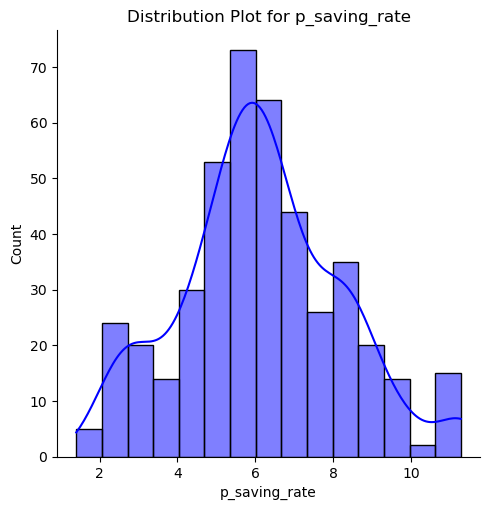

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

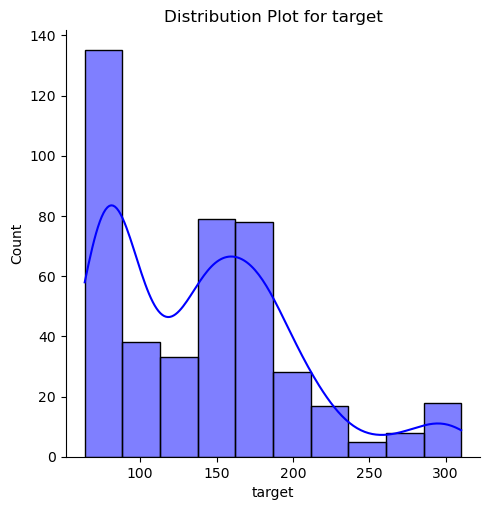

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

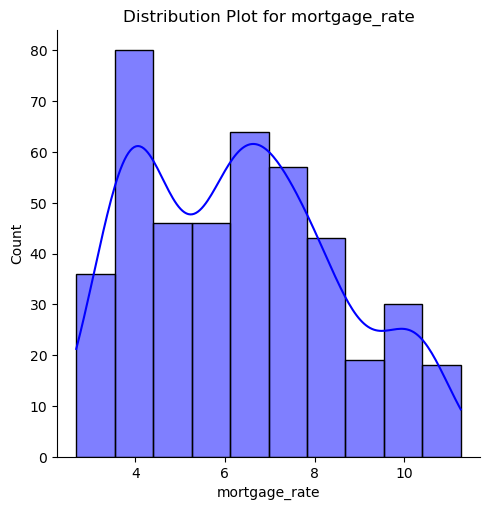

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

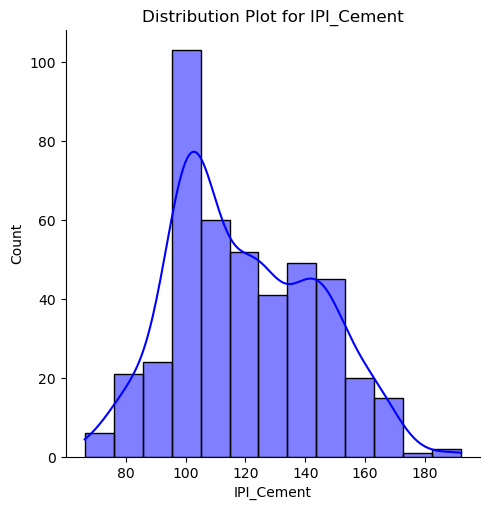

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

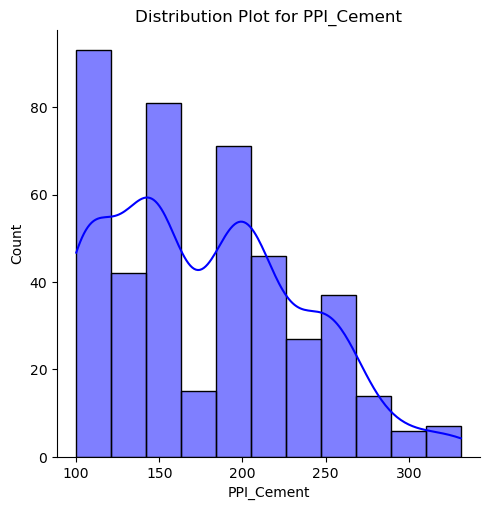

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

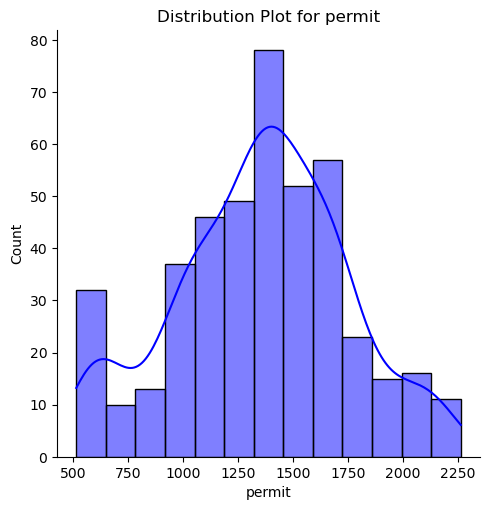

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

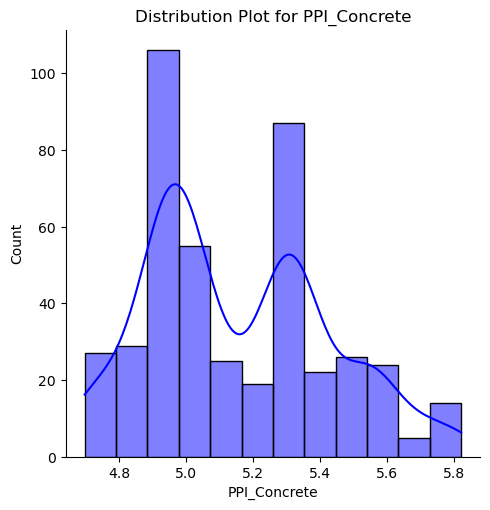

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

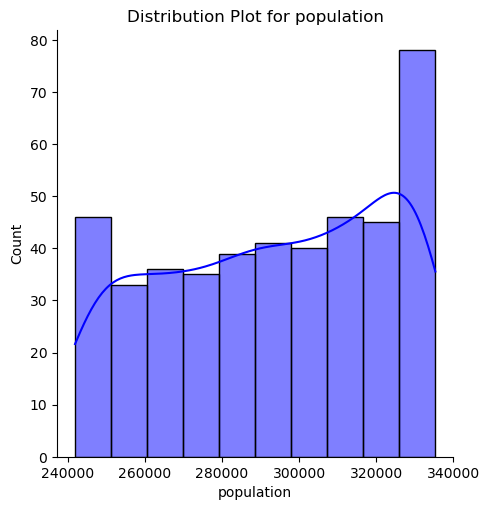

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

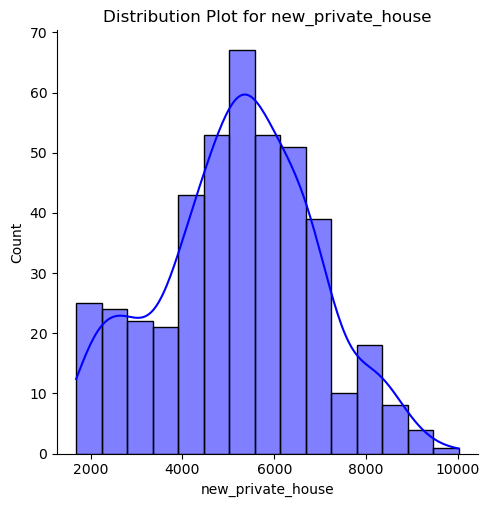

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

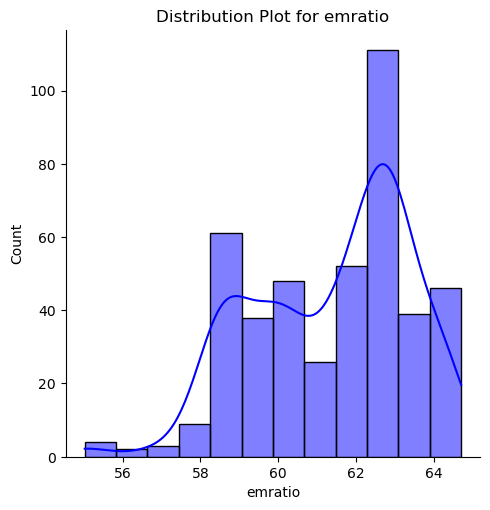

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

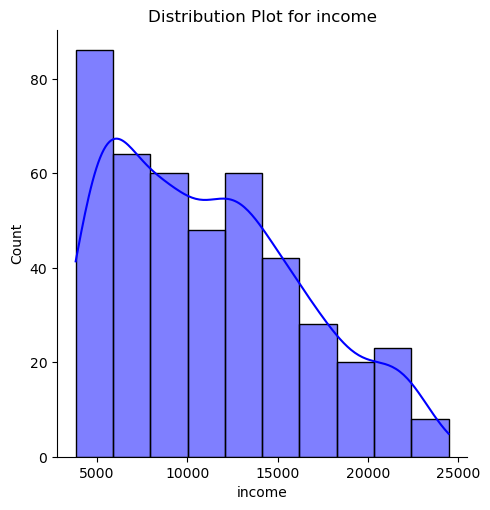

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

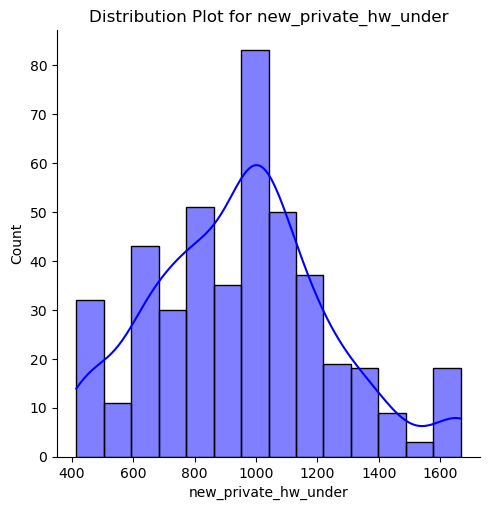

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

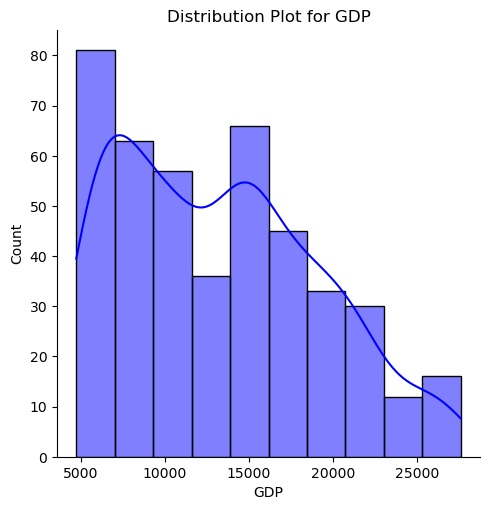

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

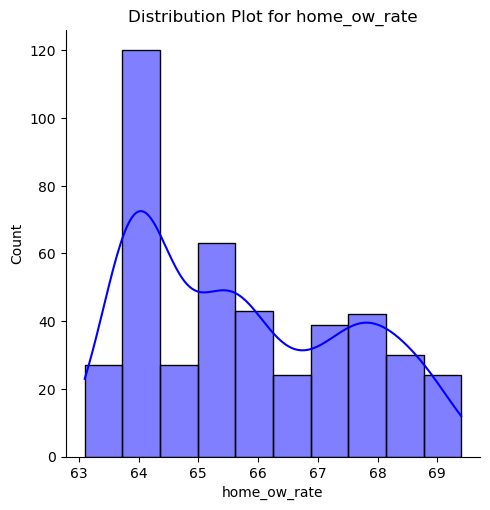

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

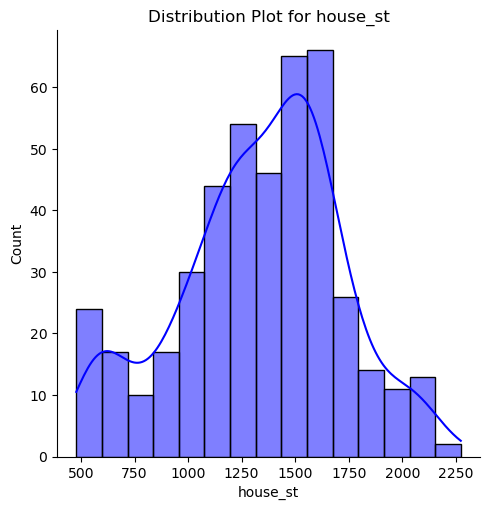

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

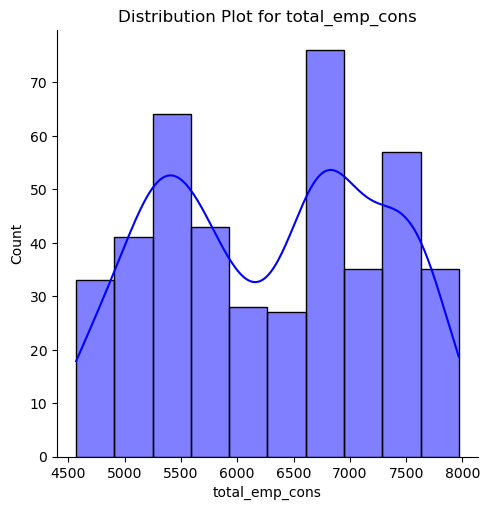

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

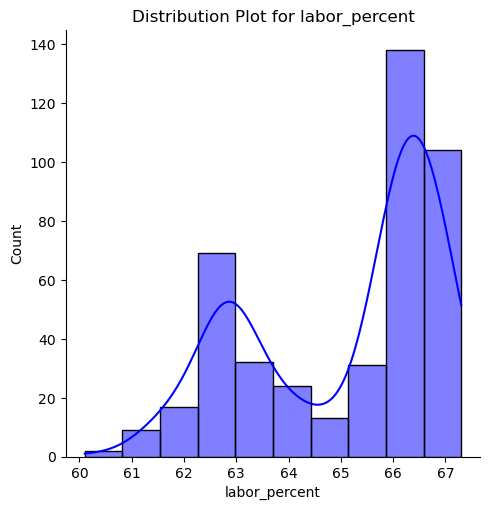

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

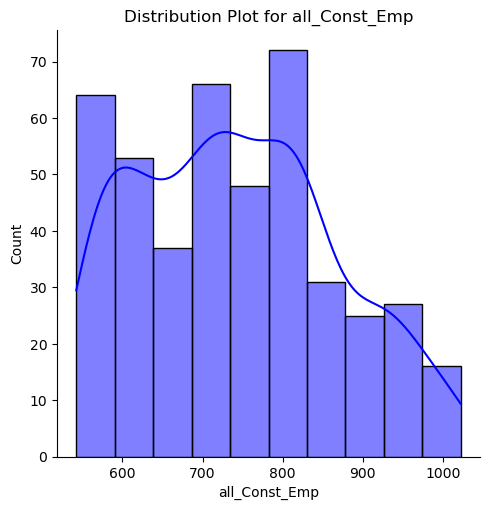

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

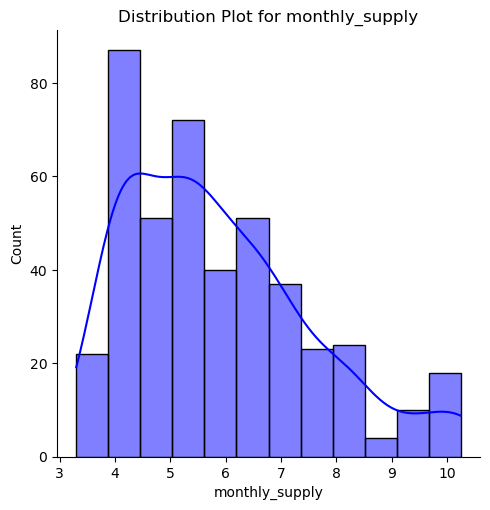

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

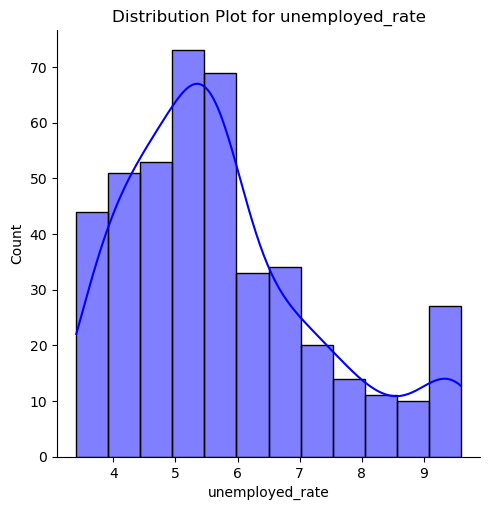

/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/vikash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

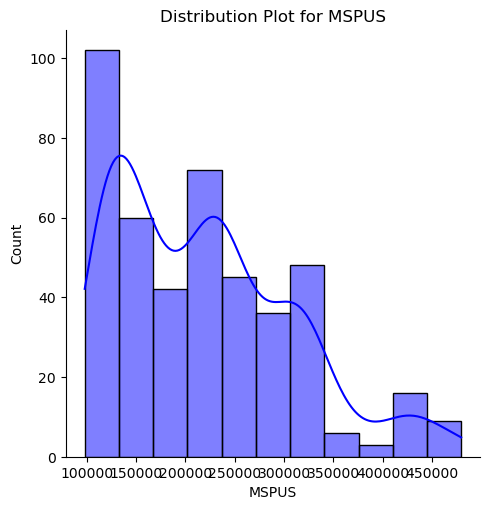

In [53]:
plt.figure(figsize=(12, 6))
for col in df.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df, x=col, kde =True, color ='blue')
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()

In [54]:
# Correlation
df.corr()

,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
p_saving_rate,1.000000,-0.286001,0.160449,-0.441105,-0.253822,-0.291234,-0.161051,-0.271412,-0.306628,-0.301335,...,-0.342571,-0.209253,-0.573282,-0.244752,-0.540029,-0.141966,-0.539758,-0.049204,0.362829,-0.227920
target,-0.286001,1.000000,-0.730709,-0.260807,0.964074,0.127189,0.939072,0.896974,-0.068468,-0.538776,...,0.634935,0.960633,0.207294,-0.001742,0.812130,-0.788313,0.560479,0.169504,-0.249211,0.980144
mortgage_rate,0.160449,-0.730709,1.000000,0.374927,-0.800391,0.130017,-0.838759,-0.925147,0.414840,0.696491,...,-0.112323,-0.840159,-0.167990,0.265751,-0.543490,0.752282,-0.132065,0.163664,-0.126700,-0.781561
IPI_Cement,-0.441105,-0.260807,0.374927,1.000000,-0.372851,0.745597,-0.484448,-0.373290,0.834607,0.774019,...,0.386067,-0.414524,0.544920,0.779616,0.257455,0.627042,0.571658,-0.330280,-0.473682,-0.353456
PPI_Cement,-0.253822,0.964074,-0.800391,-0.372851,1.000000,-0.028223,0.978485,0.952654,-0.221662,-0.589465,...,0.500086,0.986678,0.128010,-0.157392,0.770929,-0.822943,0.434449,0.166664,-0.206718,0.972509
permit,-0.291234,0.127189,0.130017,0.745597,-0.028223,1.000000,-0.128779,-0.088916,0.889073,0.493668,...,0.743859,-0.038683,0.386116,0.972313,0.471157,0.198774,0.740357,-0.497293,-0.634280,0.059115
PPI_Concrete,-0.161051,0.939072,-0.838759,-0.484448,0.978485,-0.128779,1.000000,0.958851,-0.351442,-0.678273,...,0.377790,0.987635,0.067125,-0.256612,0.669943,-0.857081,0.291331,0.153737,-0.088911,0.962709
population,-0.271412,0.896974,-0.925147,-0.373290,0.952654,-0.088916,0.958851,1.000000,-0.328427,-0.651628,...,0.325743,0.968801,0.186809,-0.229838,0.718367,-0.815936,0.319266,0.018545,-0.069665,0.928428
new_private_house,-0.306628,-0.068468,0.414840,0.834607,-0.221662,0.889073,-0.351442,-0.328427,1.000000,0.680909,...,0.670433,-0.274421,0.435777,0.914480,0.351767,0.449951,0.724477,-0.267617,-0.588822,-0.178050
emratio,-0.301335,-0.538776,0.696491,0.774019,-0.589465,0.493668,-0.678273,-0.651628,0.680909,1.000000,...,0.147818,-0.649540,0.233704,0.579290,-0.052302,0.860089,0.272765,-0.138820,-0.540828,-0.606754


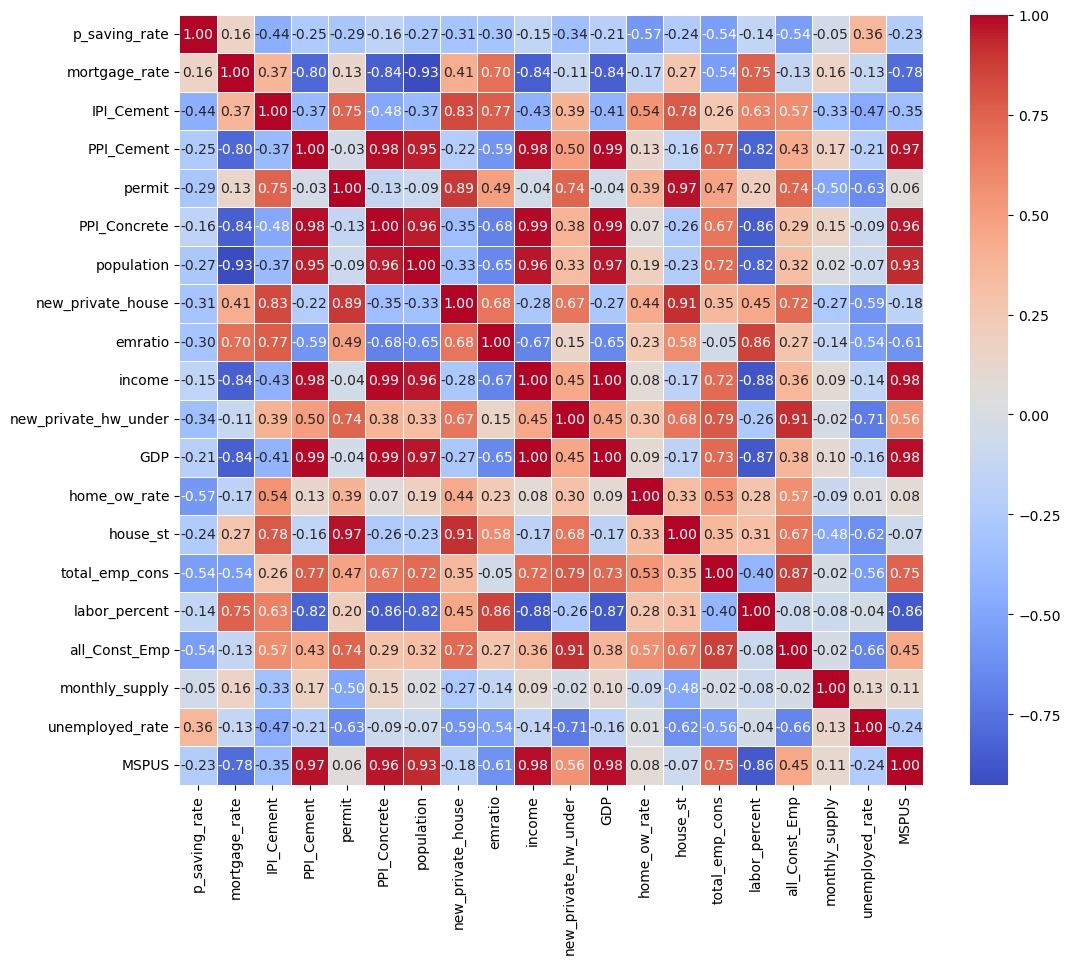

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()


In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

## Split the dataset into training and testing sets.

In [56]:
# Separating the target variable and the independent variable
y = df.pop("target")
X = df

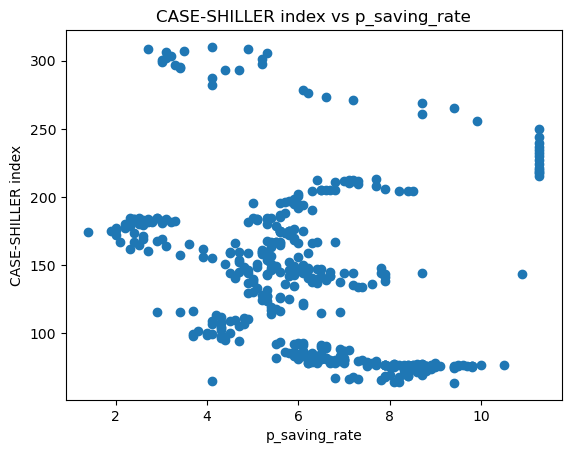

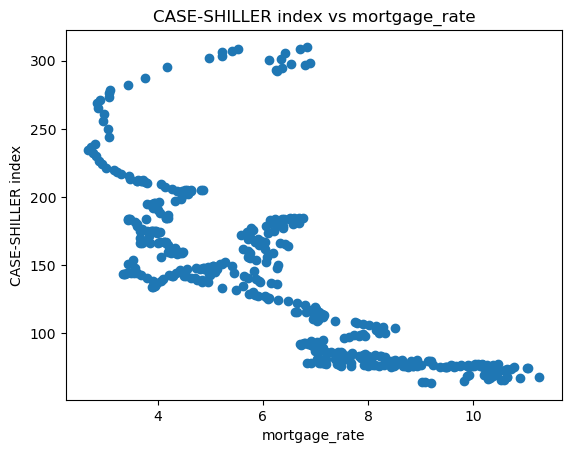

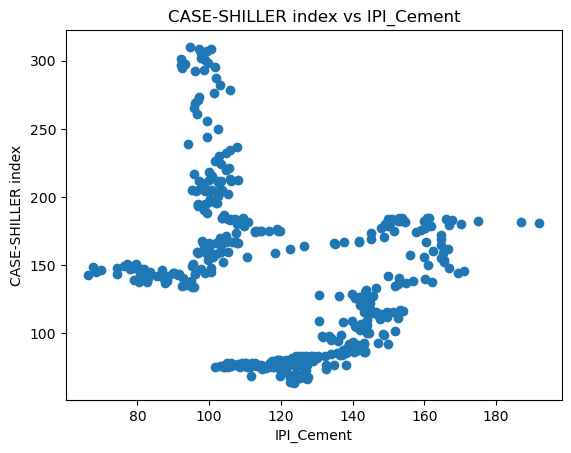

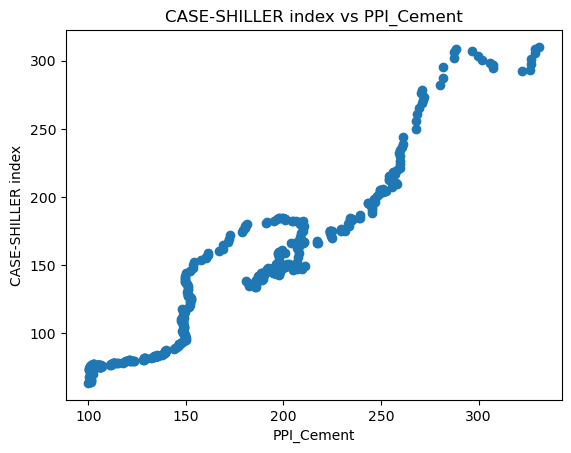

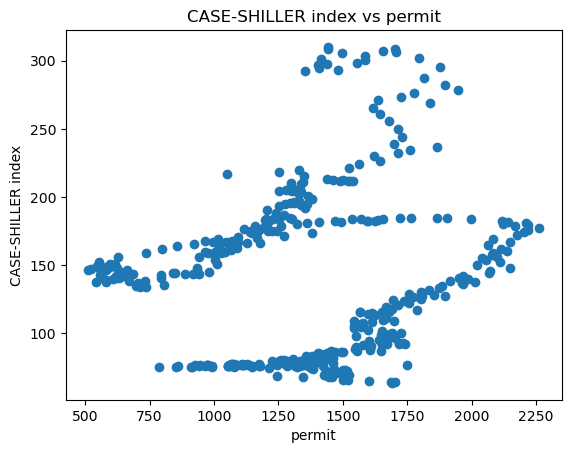

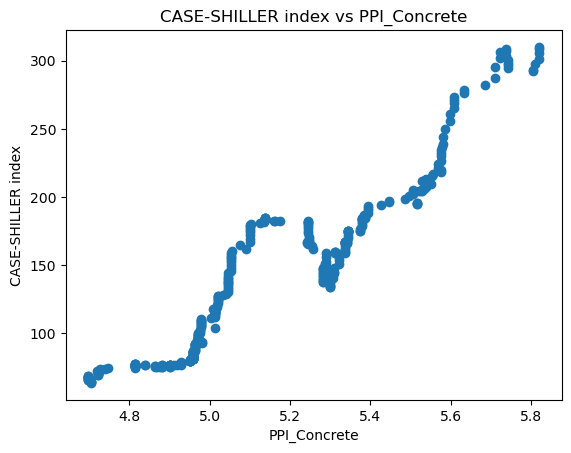

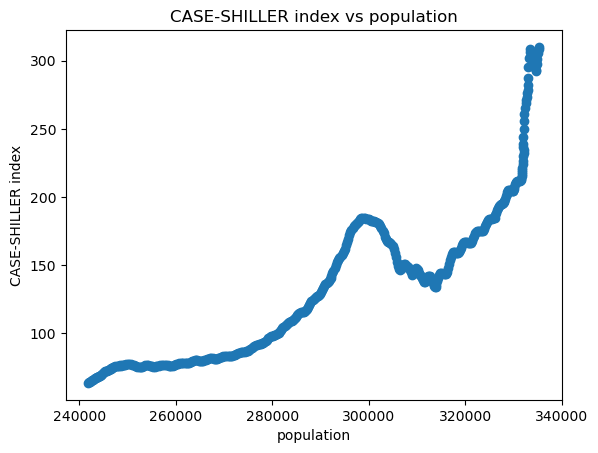

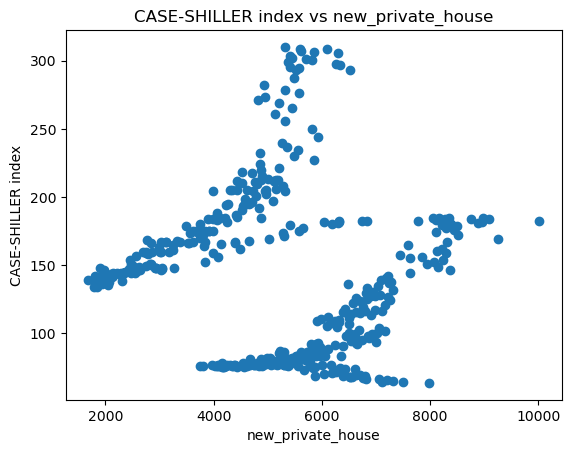

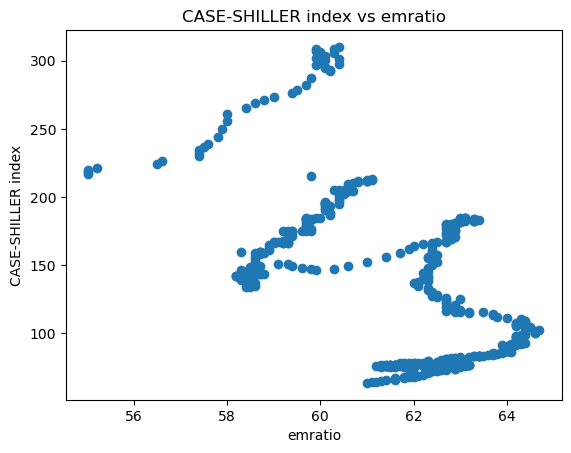

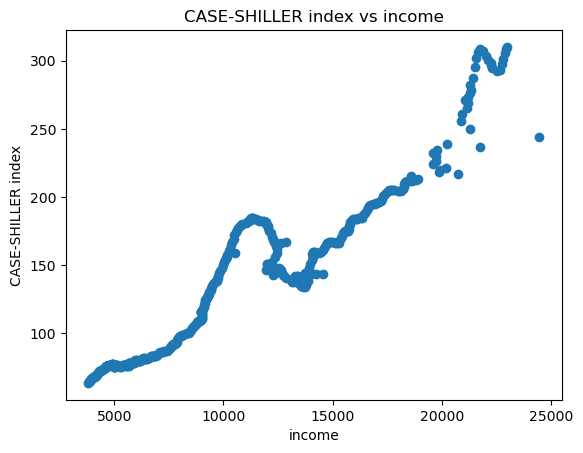

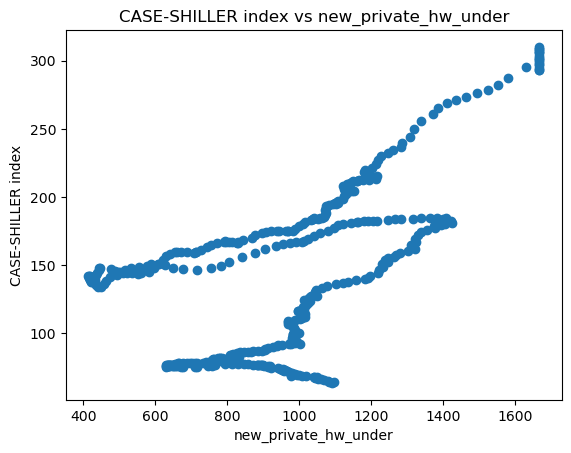

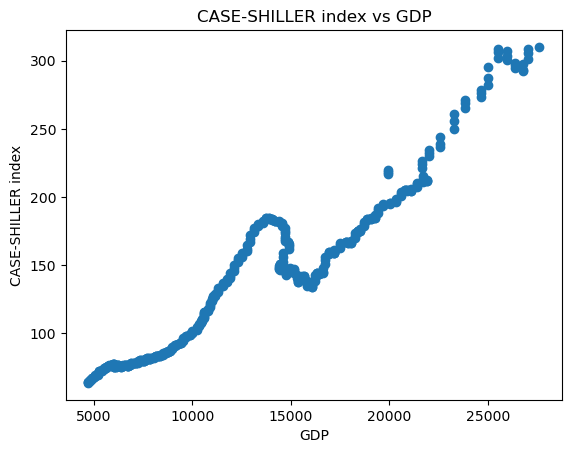

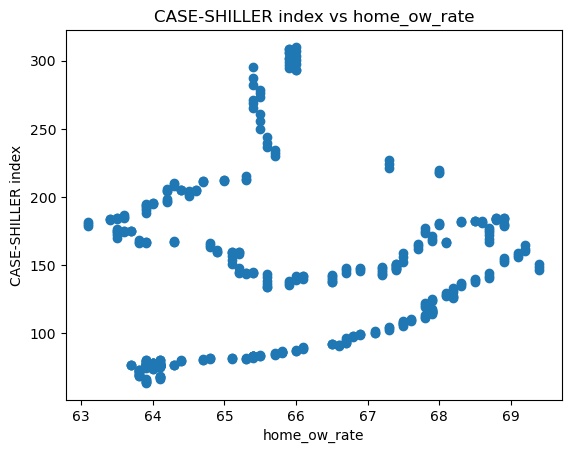

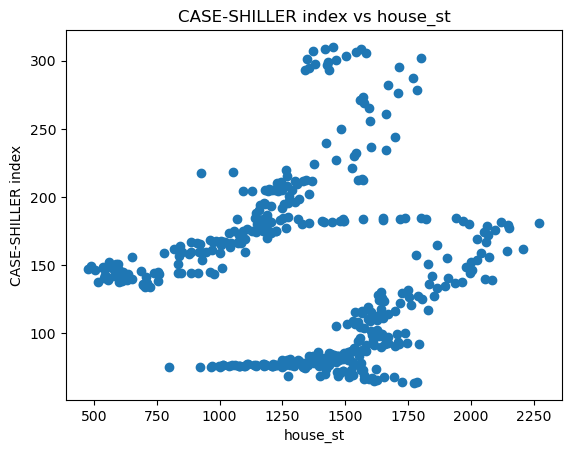

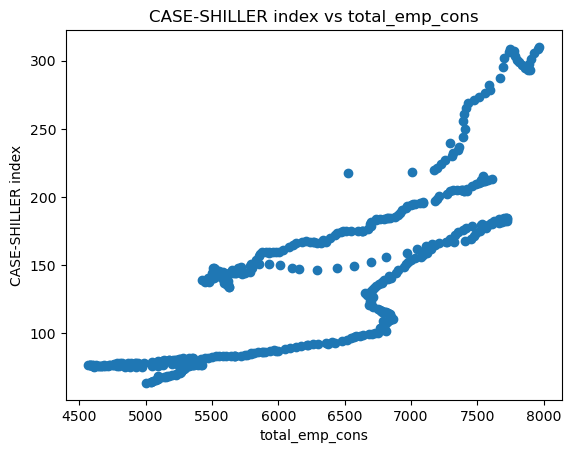

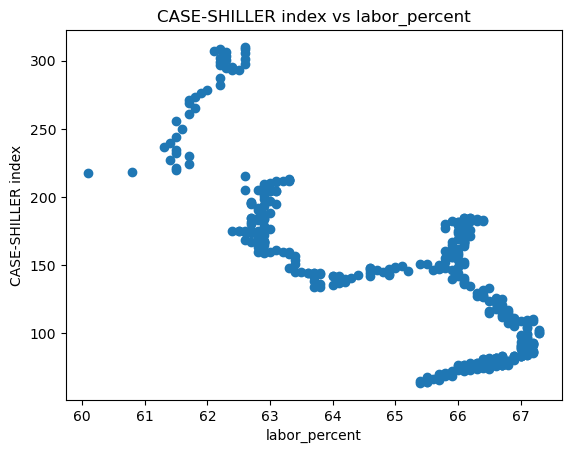

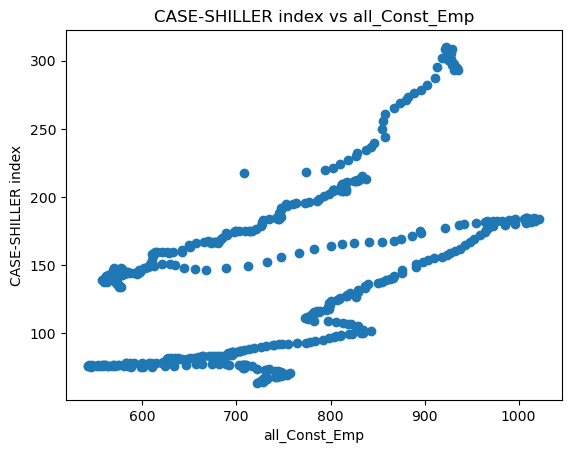

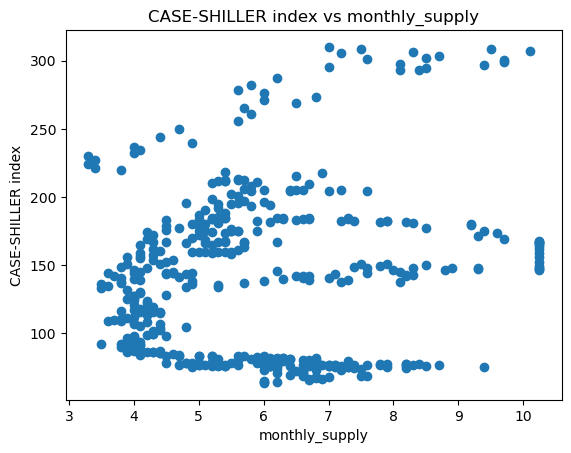

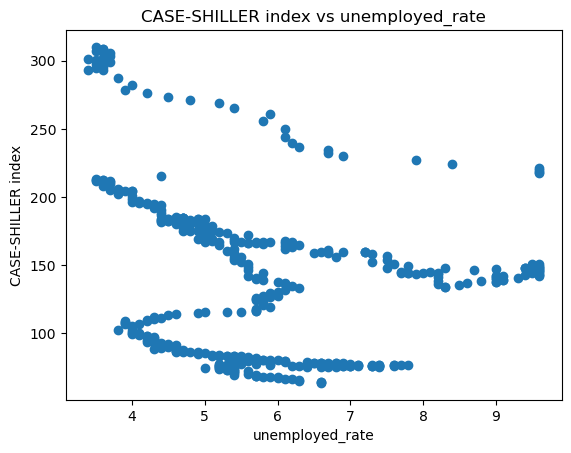

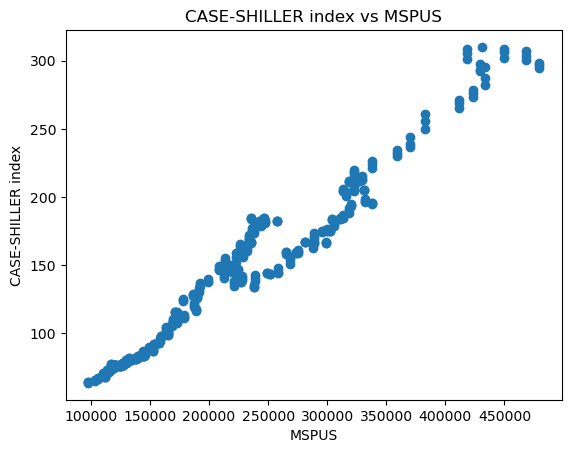

In [57]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

## Model Building


In [60]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [62]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [64]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.9966728567659875


## The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [66]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for p_saving_rate is -1.0185520376525756
The coefficient for mortgage_rate is -2.9895444047223556
The coefficient for IPI_Cement is 2.2843320509307903
The coefficient for PPI_Cement is -6.4112275310339095
The coefficient for permit is -1.5411113434537895
The coefficient for PPI_Concrete is 19.889683651792765
The coefficient for population is -16.554214369034614
The coefficient for new_private_house is 0.3579559499654259
The coefficient for emratio is -4.283474694747449
The coefficient for income is -2.8213520599525017
The coefficient for new_private_hw_under is 7.355874854190863
The coefficient for GDP is 39.57535885437518
The coefficient for home_ow_rate is -0.6893309733779761
The coefficient for house_st is -0.01842712097845697
The coefficient for total_emp_cons is -4.983383049986016
The coefficient for labor_percent is 7.640504794038096
The coefficient for all_Const_Emp is 14.643152882072918
The coefficient for monthly_supply is 2.4137557398486544
The coefficient for

In [69]:
# The intercept
print("The intercept is: ", model.intercept_)

The intercept is:  141.17932926047192


# CONCLUSION 

## All data are downloaded from "Federal Reserve Economic Data (FRED"
## Due to the shortage of time, i couldn't show the visualization of each features separately.
## This is a regression model so i choose the Linear Regression as it is foundation of ML aglorithms and it gave the almost 100% of accuracy.
## I know many features are showing good cofficient score and varing in very wide range, it can be minimised by using cross-validation technique.
## correlation coefficient also measure the strength and direction of the linear relationship between two variables.correlation coefficient also ranges from -1 to 1, where -1 indicates perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.I have plotted HeatMap to showcase it.
## My model intercept is 141.17 which is almost equal to the mean value of taget cloumn i.e.141.15.
## In general also Several factors play a crucial role in determining the price of a house. Location is a key influencer, with houses in sought-after areas, close to amenities like schools and parks, often commanding higher prices. Size is another significant factor, as larger houses generally come with a higher price tag. The condition of a house also matters, as well-maintained homes tend to be more expensive than those in need of repairs. Additional features, or amenities, such as a swimming pool or a finished basement, can also impact the price. Market conditions, whether it's a seller's or buyer's market, contribute to price fluctuations. Interest rates further play a role; lower rates make homeownership more accessible and can drive prices up, while higher rates may have the opposite effect. Predicting the future price of a house is challenging due to these multifaceted factors. However, having a comprehensive understanding of these influences empowers individuals to make informed decisions when buying or selling a house.
